In [1]:
import numpy as np
import pandas as pd
import sklearn as sklearn
from collections import Counter
import nltk
import re
import os
import random
from scipy.sparse import csr_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
source_train = pd.read_csv('train.csv',  sep=',')
source_test = pd.read_csv('test.csv',  sep=',')

In [3]:
data_train = source_train[:200000].copy()
data_test = source_train[200000:].copy()
data_test = data_test.reset_index(drop=True)

random.seed(23)

In [4]:
STOP_WORDS = ["a", "about", "after", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been",
            "before", "being", "between", "both", "by", "could", "did", "do", "does", "doing", "during", "each",
            "for", "from", "further", "had", "has", "have", "having", "he", "her", "here", "hers", "herself", "him",
            "himself", "his", "how", "i", "in", "into", "is", "it", "its", "itself", "let", "me", "more", "most", "my",
            "myself", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "own", "sha",
            "she", "should", "so", "some", "such", "than", "that", "the", "their", "theirs", "them", "themselves",
            "then", "there", "there's", "these", "they", "this", "those", "through", "to", "until", "up", "very",
            "was", "we", "were", "what", "when", "where", "which", "while", "who","whom", "with", "would", "you",
            "your", "yours", "yourself", "yourselves",
            "n't", "'s", "'ll", "'re", "'d", "'m", "'ve",
            "above", "again", "against", "below", "but", "down", "few", "if", "no", "nor", "off",
            "out", "over", "same", "too", "under",
             "I", "phone",]

In [5]:
print('Null reviews', data_train['Reviews'].isnull().sum())
data_train.head()

Null reviews 26


,Id,Product Name,Brand Name,Price,Reviews,Rating
0,1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,I feel so LUCKY to have found this used (phone...,5
1,2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,"nice phone, nice up grade from my pantach revu...",4
2,3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,Very pleased,5
3,4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,It works good but it goes slow sometimes but i...,4
4,5,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,Great phone to replace my lost phone. The only...,4


In [6]:
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import TweetTokenizer
import string
tokenizer = TweetTokenizer(r'\w+')

class Tokenizer():
    @staticmethod
    def tokenize(text):
        pass

class SimpleTokenizer(Tokenizer):
    @staticmethod
    def tokenize(text):
        text_lower = text.lower()
        words = tokenizer.tokenize(text_lower)
        filtered_stop_words = [word for word in words if word not in STOP_WORDS]
        filtered_punctuation_words = [word for word in filtered_stop_words if word not in string.punctuation]
        return filtered_punctuation_words
        pass


In [7]:
words = Counter()

for i in data_train.index:
    row_data = data_train.iloc[i]
    if (not isinstance(row_data.Reviews, float)):
        reviews_tokenized = []
        reviews_tokenized = SimpleTokenizer.tokenize(row_data.Reviews)
        words.update(reviews_tokenized)
    if (i % 1000 == 0):
        print(round(i/len(data_train) * 100,2), '%')

print('100 %')

0.0 %
0.5 %
1.0 %
1.5 %
2.0 %
2.5 %
3.0 %
3.5 %
4.0 %
4.5 %
5.0 %
5.5 %
6.0 %
6.5 %
7.0 %
7.5 %
8.0 %
8.5 %
9.0 %
9.5 %
10.0 %
10.5 %
11.0 %
11.5 %
12.0 %
12.5 %
13.0 %
13.5 %
14.0 %
14.5 %
15.0 %
15.5 %
16.0 %
16.5 %
17.0 %
17.5 %
18.0 %
18.5 %
19.0 %
19.5 %
20.0 %
20.5 %
21.0 %
21.5 %
22.0 %
22.5 %
23.0 %
23.5 %
24.0 %
24.5 %
25.0 %
25.5 %
26.0 %
26.5 %
27.0 %
27.5 %
28.0 %
28.5 %
29.0 %
29.5 %
30.0 %
30.5 %
31.0 %
31.5 %
32.0 %
32.5 %
33.0 %
33.5 %
34.0 %
34.5 %
35.0 %
35.5 %
36.0 %
36.5 %
37.0 %
37.5 %
38.0 %
38.5 %
39.0 %
39.5 %
40.0 %
40.5 %
41.0 %
41.5 %
42.0 %
42.5 %
43.0 %
43.5 %
44.0 %
44.5 %
45.0 %
45.5 %
46.0 %
46.5 %
47.0 %
47.5 %
48.0 %
48.5 %
49.0 %
49.5 %
50.0 %
50.5 %
51.0 %
51.5 %
52.0 %
52.5 %
53.0 %
53.5 %
54.0 %
54.5 %
55.0 %
55.5 %
56.0 %
56.5 %
57.0 %
57.5 %
58.0 %
58.5 %
59.0 %
59.5 %
60.0 %
60.5 %
61.0 %
61.5 %
62.0 %
62.5 %
63.0 %
63.5 %
64.0 %
64.5 %
65.0 %
65.5 %
66.0 %
66.5 %
67.0 %
67.5 %
68.0 %
68.5 %
69.0 %
69.5 %
70.0 %
70.5 %
71.0 %
71.5 %
72.0 %
72.5 

c:\users\mati\envs\envwin\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


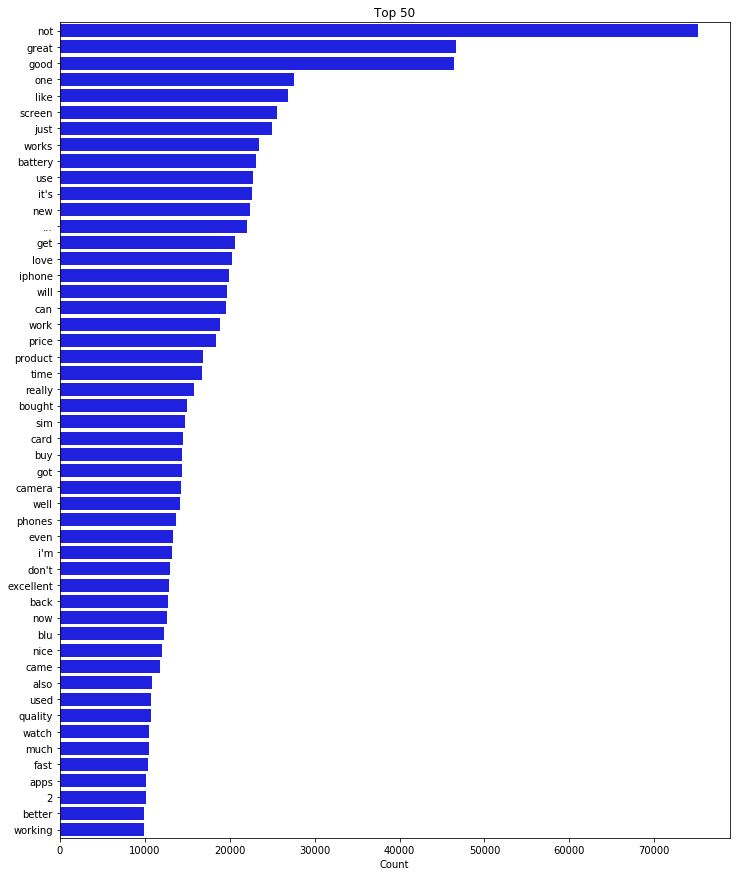

In [8]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

def show_histogram(word_counts, title=None):
    plot_df = pd.DataFrame.from_dict(word_counts).rename(columns={0:'Token', 1:'Count'})
    
    f, ax = plt.subplots(figsize=(12, 15))
    p = sns.barplot(x="Count", y="Token", data=plot_df, color="b")
    p.set(xlabel="Count", ylabel="", title=title)

common = words.most_common(50)
show_histogram(common, 'Top 50')

In [9]:
def create_bow(documents, features):
    row = []
    col = []
    data = []

    labels = []
    
    print('documents length', len(documents))

    for i in documents.index:
        row_data = documents.iloc[i]
        label = row_data.Rating
        if (isinstance(row_data.Reviews, float)):
            reviews_tokenized = []
        else:
            reviews_tokenized = SimpleTokenizer.tokenize(row_data.Reviews)

        labels.append(label)
        for token in set(reviews_tokenized):
            if token not in features:
                continue
            row.append(i)
            col.append(features[token])
            data.append(1)

        if (i % 10000 == 0):
            print(round(i/len(documents) * 100,2), '%')

    print('100 %')
    
    return csr_matrix((data, (row, col)), shape=(len(documents), len(features))), labels


def create_bow_X(documents, features):
    row = []
    col = []
    data = []

    for i in documents.index:
        row_data = documents.iloc[i]
        if (isinstance(row_data.Reviews, float)):
            reviews_tokenized = []
        else:
            reviews_tokenized = SimpleTokenizer.tokenize(row_data.Reviews)
        for token in set(reviews_tokenized):
            if token not in features:
                continue
            row.append(i)
            col.append(features[token])
            data.append(1)

        if (i % 10000 == 0):
            print(round(i/len(documents) * 100,2), '%')

    print('100 %')
    
    return csr_matrix((data, (row, col)), shape=(len(documents), len(features)))

In [10]:
from sklearn.svm import LinearSVC

min_word_count = 2

common_words = list([k for k, v in words.most_common() if v > min_word_count])

feature_dict = {}
for word in common_words:
    feature_dict[word] = len(feature_dict)
    
print("Training create bow...")
X_train, y_train = create_bow(data_train, feature_dict)

Training create bow...
documents length 200000
0.0 %
5.0 %
10.0 %
15.0 %
20.0 %
25.0 %
30.0 %
35.0 %
40.0 %
45.0 %
50.0 %
55.0 %
60.0 %
65.0 %
70.0 %
75.0 %
80.0 %
85.0 %
90.0 %
95.0 %
100 %


In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

classifier = MLPRegressor(
    activation='relu',
    alpha=0.001,
    tol=0.0001,
    hidden_layer_sizes=(50,50,50),
    learning_rate='adaptive',
    solver='adam',
    max_iter=4,
    verbose=True
    #     warm_start=True
)

# mlp = MLPClassifier(max_iter=50, verbose=10)
# parameter_space = {
#     'hidden_layer_sizes': [(15,15,15), (50,50,50), (50,100,50), (100,)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive'],
# }


# from sklearn.model_selection import GridSearchCV
# DEAP_x_train = X_train[0:5000]
# DEAP_y_train = y_train[0:5000]
# clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
# clf.fit(DEAP_x_train, DEAP_y_train)


# # Best paramete set
# print('Best parameters found:\n', clf.best_params_)

In [14]:
print("Training classifier... (it would takes few minutes)")
classifier.fit(X_train, y_train)

Training classifier...
Iteration 1, loss = 0.57125668
Iteration 2, loss = 0.13441508
Iteration 3, loss = 0.09438334
Iteration 4, loss = 0.07820900


c:\users\mati\envs\envwin\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50, 50), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=4, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [16]:
predicted_train = classifier.predict(X_train)
sqrt(mean_squared_error(y_train, predicted_train))

0.35998846341944335

In [17]:
print("Testing create bow ...")
X_test, y_test = create_bow(data_test, feature_dict)
print("Testing predict ...")
predicted_test = classifier.predict(X_test)

Testing create bow ...
documents length 2645
0.0 %
100 %
Testing predict ...


In [19]:
rmse = sqrt(mean_squared_error(y_test, predicted_test))
print('Test rmse (should be below 0.8)', rmse)

Test rmse (should be below 0.8) 0.7947104929678889


In [20]:
pd.DataFrame({'source':y_test, 'predicted':predicted_test}).head()

,source,predicted
0,5,4.895326
1,5,4.883472
2,4,4.404419
3,1,1.037344
4,5,4.881492


In [21]:
print("Predicton of test.csv")

Predicton of test.csv


In [22]:
data_result_test = source_test.copy()

In [23]:
print("Testing create bow ...")
X_result_test = create_bow_X(data_result_test, feature_dict)
print("Testing predict ...")
predict_result = classifier.predict(X_result_test)

Testing create bow ...
0.0 %
4.73 %
9.47 %
14.2 %
18.94 %
23.67 %
28.41 %
33.14 %
37.88 %
42.61 %
47.35 %
52.08 %
56.82 %
61.55 %
66.29 %
71.02 %
75.76 %
80.49 %
85.23 %
89.96 %
94.7 %
99.43 %
100 %
Testing predict ...


In [24]:
avg_sum = 0
avg_count = 0
for i in range(0, len(data_train)):
    if (isinstance(data_train.iloc[i].Reviews, float)):
        avg_sum += data_train.iloc[i].Rating
        avg_count += 1
avg_no_rating = avg_sum/avg_count

for i in range(0, len(predict_result)):
    value = predict_result[i]
    if (value > 5):
        predict_result[i] = 5
    if (value < 1):
        predict_result[i] = 1
    if (isinstance(data_result_test.iloc[i].Reviews, float)):
        predict_result[i] = avg_no_rating

In [28]:
results = data_result_test.copy()[['Id']]
results['Rating'] = predict_result
print('Results length (21195 rows on 30% data set, greater on 70%):', len(results))

Results length (21195 rows on 30% data set, greater on 70%): 211195


In [31]:
results.to_csv('mg_122555_results.csv', sep=',', index=False)

In [32]:
results

,Id,Rating
0,202646,4.877317
1,202647,4.684331
2,202648,4.983309
3,202649,4.458738
4,202650,3.412307
5,202651,3.873684
6,202652,4.869336
7,202653,4.894109
8,202654,5.000000
9,202655,4.738854
